<a href="https://colab.research.google.com/github/poperskop/ML-projects/blob/main/FakeNews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('Fake News Detection Dataset.csv')
df.head()

,ID,Word_Count,Number_of_Sentence,Unique_Words,Average_Word_Length,Label
0,1606,10,4,24,6.176750,1
1,3718,10,8,25,5.826770,1
2,2634,10,7,18,4.619040,1
3,5560,10,6,18,4.961424,1
4,7494,10,4,21,4.114324,1


In [3]:
df.drop(['ID'], axis=1, inplace=True)

In [4]:
df.describe()

,Word_Count,Number_of_Sentence,Unique_Words,Average_Word_Length,Label
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,53.934000,8.934667,24.943333,4.968105,0.329556
std,24.872743,3.407847,11.540708,1.152394,0.470104
min,10.000000,4.000000,5.000000,3.000385,0.000000
25%,35.000000,6.000000,17.000000,3.980553,0.000000
50%,52.000000,9.000000,22.000000,4.906200,0.000000
75%,75.000000,12.000000,33.000000,5.996111,1.000000
max,100.000000,15.000000,50.000000,6.999799,1.000000


<Axes: >

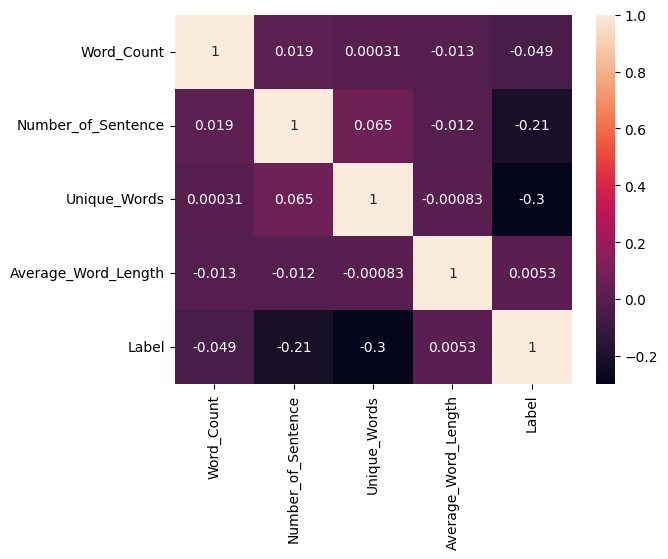

In [5]:
sns.heatmap(df.corr(), annot=True)

In [7]:
df.groupby(by='Label').mean()

,Word_Count,Number_of_Sentence,Unique_Words,Average_Word_Length
Label,,,,
0,54.787206,9.448127,27.367584,4.963817
1,52.198247,7.890088,20.011463,4.976828


In [9]:
df.groupby(by='Label').std()

,Word_Count,Number_of_Sentence,Unique_Words,Average_Word_Length
Label,,,,
0,25.874041,3.521162,13.266891,1.146290
1,22.608976,2.897377,3.134718,1.165053


In [10]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Label'], axis=1), df['Label'], test_size=0.3, random_state=23)

In [11]:
simple_imputer = SimpleImputer(strategy='median')
std_scaler = StandardScaler()
pipe_num = Pipeline([('imputer', simple_imputer), ('scaler', std_scaler)])

model = RandomForestClassifier()
pipe = Pipeline([('preproc', pipe_num),
                       ('model', model)])

In [14]:
pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)
mean_absolute_error(y_test, pred)

0.08592592592592592